In [1]:
import numpy as np
x=np.array([50,53,54,55,56,59,62,65,67,71,72,74,75,76,79,80,82,85,87,90,93,94,95,97,100])

y=np.array([122,118,128,121,125,136,144,142,149,161,167,168,162,171,175,182,180,183,188,200,194,206,207,210,219])


print(x.shape)
print(y.shape)

(25,)
(25,)


In [2]:

xy = 0
x_sum = 0
y_sum =  0
x2_sum = 0

for i in range(len(x)):
    xy += x[i]*y[i]
    x_sum += x[i]
    y_sum += y[i]
    x2_sum += x[i]*x[i]

m = ((25*xy) - (x_sum*y_sum)) / ((25*x2_sum) - ((x_sum)**2))

c = (y_sum - m*(x_sum)) / 25

In [3]:
print(xy)
print(x_sum)
print(y_sum)
print(x2_sum)

322516
1871
4158
145705


In [4]:
print(m)
print(c)

1.9951684696867253
17.001591728645472


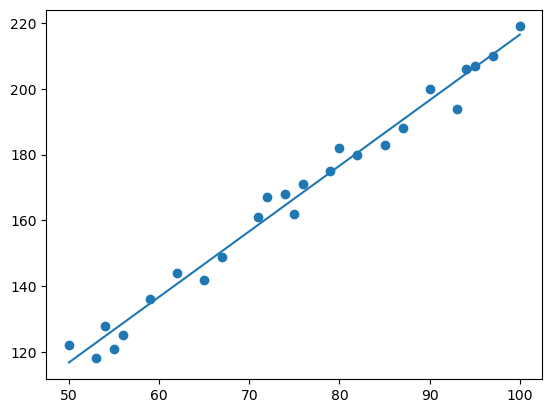

In [5]:
import matplotlib.pyplot as plt               # hard code

plt.scatter(x,y)
plt.plot(x,1.9951684696867253 * x + 17.001591728645472)
plt.show()



In [6]:
from sklearn.linear_model import LinearRegression          # LinearRegression

reg = LinearRegression()


x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

reg.fit(x,y)

print(reg.coef_)
print(reg.intercept_)

[[1.99516847]]
[17.00159173]


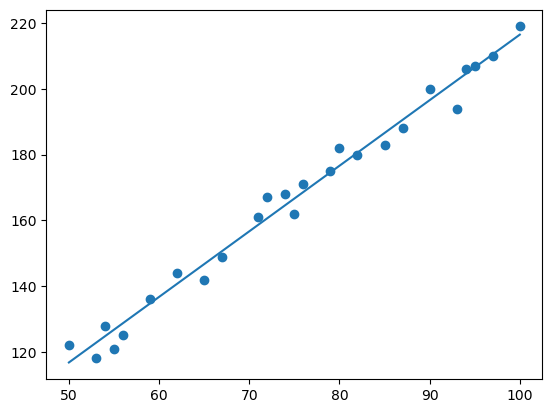

In [7]:
plt.scatter(x,y)
plt.plot(x,(1.99516847 * x )+ 17.00159173)
plt.show()

In [8]:
from sklearn.linear_model import Ridge       # Ridge

reg = Ridge(alpha=.5)


x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

reg.fit(x,y)

print(reg.coef_)
print(reg.intercept_)

[[1.99499283]]
[17.01473628]


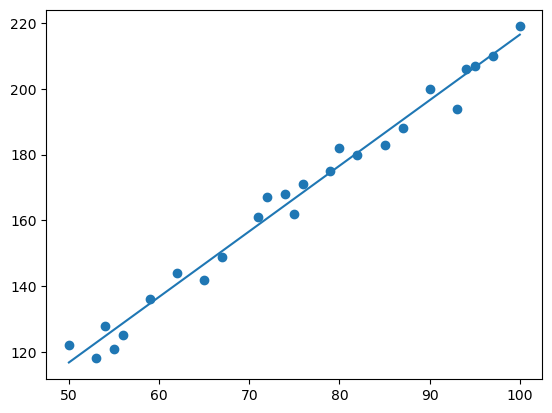

In [9]:
plt.scatter(x,y)
plt.plot(x,(1.99499283 * x )+ 17.01473628)
plt.show()

In [10]:
y_pred = []

for i in range(len(x)):
    y_pred.append((1.99499283 * x[i] ) + 17.01473628)


In [11]:
print("actual:     ",y)

actual:      [[122]
 [118]
 [128]
 [121]
 [125]
 [136]
 [144]
 [142]
 [149]
 [161]
 [167]
 [168]
 [162]
 [171]
 [175]
 [182]
 [180]
 [183]
 [188]
 [200]
 [194]
 [206]
 [207]
 [210]
 [219]]


In [12]:
print(len(y_pred))
print("prediction: ",y_pred)

25
prediction:  [array([116.76437778]), array([122.74935627]), array([124.7443491]), array([126.73934193]), array([128.73433476]), array([134.71931325]), array([140.70429174]), array([146.68927023]), array([150.67925589]), array([158.65922721]), array([160.65422004]), array([164.6442057]), array([166.63919853]), array([168.63419136]), array([174.61916985]), array([176.61416268]), array([180.60414834]), array([186.58912683]), array([190.57911249]), array([196.56409098]), array([202.54906947]), array([204.5440623]), array([206.53905513]), array([210.52904079]), array([216.51401928])]


In [13]:
# RMSE , R2
mean = np.mean(y)
square_error= 0
mean_error  = 0
for i in range(len(y)):
    square_error += (y[i] - y_pred[i])**2
    mean_error += (y[i] - mean)**2

mse = square_error/25
rmse = mse ** (0.5)
r2_score = 1 - (square_error/mean_error)

In [14]:
print("mse   :",mse)
print("rmse  :",rmse)
print("r2    :",r2_score)

mse   : [14.86510392]
rmse  : [3.85552901]
r2    : [0.98382782]


In [15]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("USA_Housing.csv")

data


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [16]:
data = data.iloc[:,0:-1]

In [17]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [18]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:
# null values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [20]:
# duplicate data
data.duplicated().sum()

0

In [21]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\4041783420.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Avg. Area Income'])


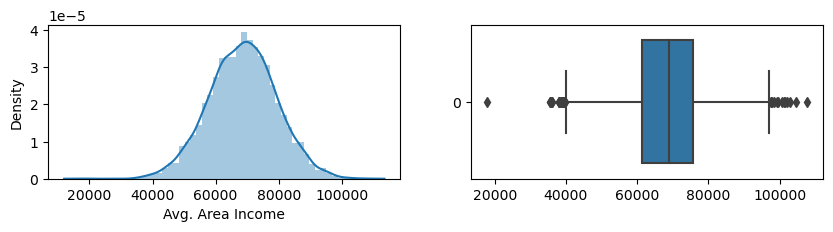

In [22]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Avg. Area Income'])
plt.subplot(1,2,2)
sns.boxplot(data['Avg. Area Income'], orient="h")

plt.show()


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\2876734159.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Avg. Area House Age'])


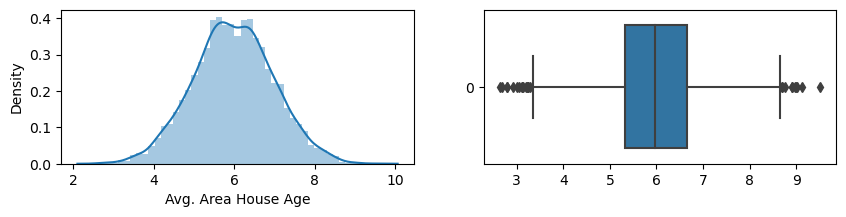

In [23]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Avg. Area House Age'])
plt.subplot(1,2,2)
sns.boxplot(data['Avg. Area House Age'], orient="h")

plt.show()


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\1465288056.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Avg. Area Number of Rooms'])


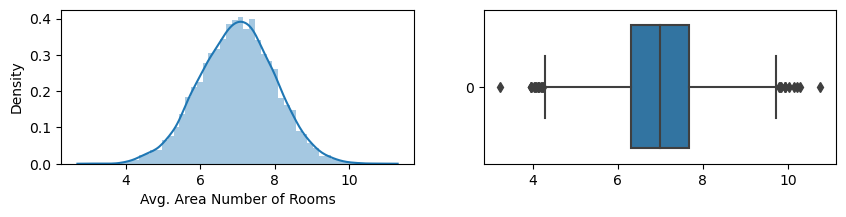

In [24]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Avg. Area Number of Rooms'])
plt.subplot(1,2,2)
sns.boxplot(data['Avg. Area Number of Rooms'], orient="h")

plt.show()


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\2401400394.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Avg. Area Number of Bedrooms'])


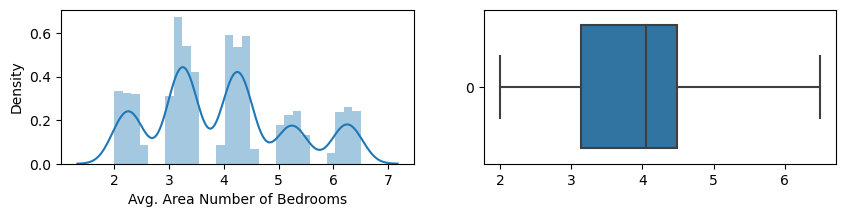

In [25]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Avg. Area Number of Bedrooms'])
plt.subplot(1,2,2)
sns.boxplot(data['Avg. Area Number of Bedrooms'], orient="h")

plt.show()


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\2712246769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area Population'])


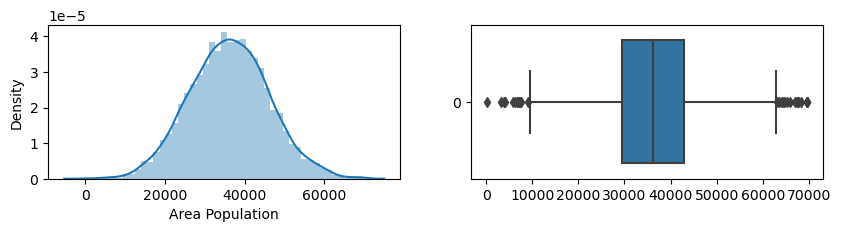

In [26]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Area Population'])
plt.subplot(1,2,2)
sns.boxplot(data['Area Population'], orient="h")

plt.show()


C:\Users\rcc\AppData\Local\Temp\ipykernel_440\1090897349.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


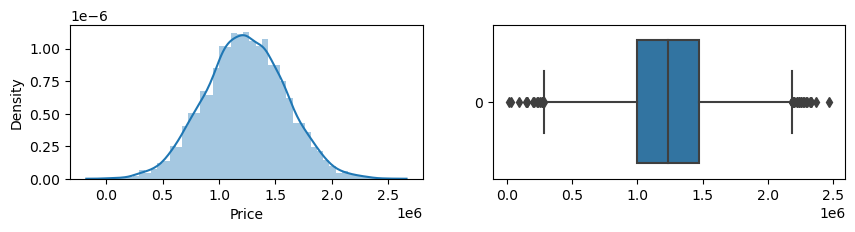

In [27]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
sns.distplot(data['Price'])
plt.subplot(1,2,2)
sns.boxplot(data['Price'], orient="h")

plt.show()


<Axes: >

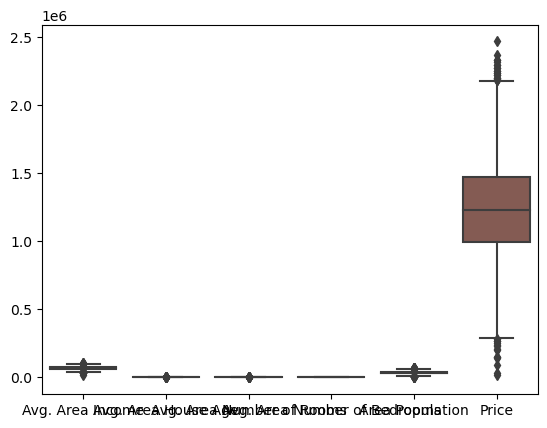

In [28]:
import seaborn as sns

sns.boxplot(data)

In [29]:
data.shape

(5000, 6)

In [30]:
# def outliers_remover(data):
#   from scipy import stats
#   import numpy as np
#   z = np.abs(stats.zscore(data))

#   threshold_z = 3
#   outlier_indices = np.where(z > threshold_z)[0]
#   no_outliers = data.drop(outlier_indices)
#   print("Original DataFrame Shape:", data.shape)
#   print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

#   return no_outliers

In [31]:
x = data.iloc[:,0:-1]
y = data['Price']

C:\Users\rcc\AppData\Local\Temp\ipykernel_440\2322112728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.clip(x.quantile(0.1),x.quantile(0.9),axis=1,inplace=True)


<Axes: >

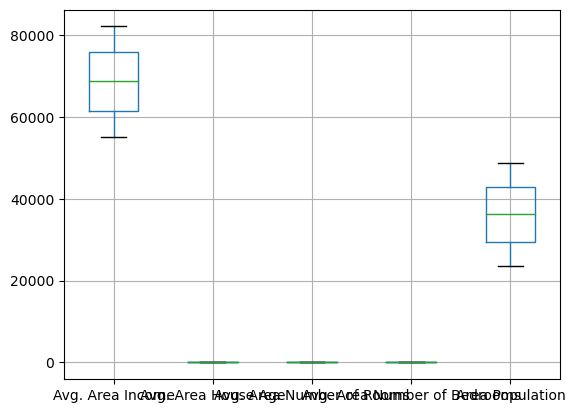

In [32]:
x.clip(x.quantile(0.1),x.quantile(0.9),axis=1,inplace=True)
x.boxplot()

In [33]:
type(x)

pandas.core.frame.DataFrame

In [34]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23502.845262
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.274222,5.13,36882.159400
3,63345.240046,7.188236,5.681951,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [35]:
x.drop('Avg. Area Number of Bedrooms',axis=1,inplace=True)

C:\Users\rcc\AppData\Local\Temp\ipykernel_440\1625609958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('Avg. Area Number of Bedrooms',axis=1,inplace=True)


In [36]:
x['Price']=y
x

C:\Users\rcc\AppData\Local\Temp\ipykernel_440\471779111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Price']=y


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23502.845262,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.274222,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.681951,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.243978,6.137356,23502.845262,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.243978,5.681951,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


In [37]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

x = sclr.fit_transform(x)
df=pd.DataFrame(x)
df

,0,1,2,3,4
0,1.257355,-0.359206,0.024099,-1.546480,-0.490081
1,1.223251,0.032077,-0.309755,0.496518,0.775508
2,-0.840522,-0.135433,1.541294,0.093205,-0.490211
3,-0.604039,1.481287,-1.567697,-0.221993,0.080843
4,-0.990450,-1.144500,1.019784,-1.197047,-1.702518
...,...,...,...,...,...
4995,-0.923148,1.549438,-1.021516,-1.546480,-0.486795
4996,1.136230,1.250089,-0.494522,-1.287491,0.709594
4997,-0.598817,1.549438,-1.567697,-0.349951,-0.570244
4998,-0.069057,-0.540731,0.169165,0.797087,-0.094640


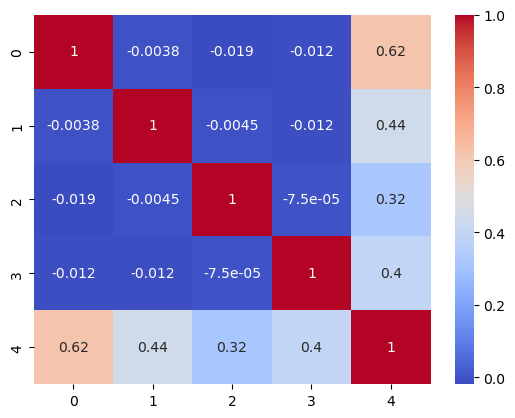

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [39]:
x = df.iloc[:,0:-1]
x

,0,1,2,3
0,1.257355,-0.359206,0.024099,-1.546480
1,1.223251,0.032077,-0.309755,0.496518
2,-0.840522,-0.135433,1.541294,0.093205
3,-0.604039,1.481287,-1.567697,-0.221993
4,-0.990450,-1.144500,1.019784,-1.197047
...,...,...,...,...
4995,-0.923148,1.549438,-1.021516,-1.546480
4996,1.136230,1.250089,-0.494522,-1.287491
4997,-0.598817,1.549438,-1.567697,-0.349951
4998,-0.069057,-0.540731,0.169165,0.797087


In [40]:
y=df.iloc[:,4:5]
y

,4
0,-0.490081
1,0.775508
2,-0.490211
3,0.080843
4,-1.702518
...,...
4995,-0.486795
4996,0.709594
4997,-0.570244
4998,-0.094640


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

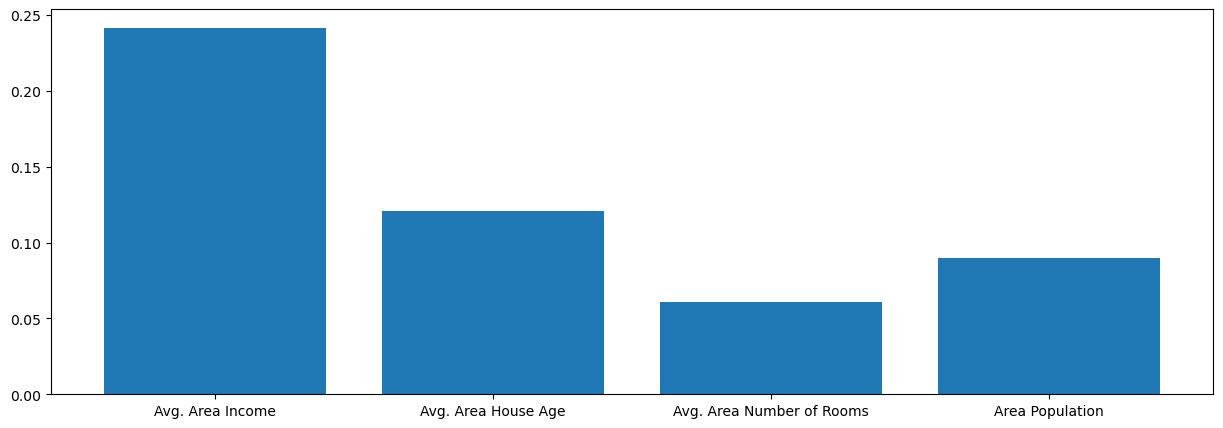

In [41]:
from sklearn.feature_selection import mutual_info_regression

l=mutual_info_regression(x,y)
plt.figure(figsize=(15,5))
plt.bar(['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population'],l)
plt.show

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

In [43]:
print(list(lm.coef_))
print(lm.intercept_)

[array([0.63203416, 0.45156497, 0.33467236, 0.40962957])]
[-0.00668316]


In [44]:
# # finding r2_score

# mean = np.mean(y_test)
# square_error= 0
# mean_error  = 0

# for i in range(len(y_test)):
#     square_error += (y[i] - y_pred[i])**2
#     mean_error += (y[i] - mean)**2

# mse = square_error/25
# rmse = mse ** (0.5)
# r2_score = 1 - (square_error/mean_error)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2_score(y_test,y_pred)


0.861204321024209

In [45]:
(mean_squared_error(y_test,y_pred))

0.13356890988601972

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.3654708057916798

In [47]:
mean_absolute_error(y_test,y_pred)

0.28556367197533633